---
# Ejercicio 7

**a)** Desarrolle dos métodos para generar una variable aleatoria X con densidad de probabilidad:

$$
f(x) =
\begin{cases}
\frac{1}{x}\quad \text{si } 1\leq x \leq e \\
0          \quad \text{cc}
\end{cases}
$$

i. Aplicando Transformada inversa

ii. Aplicando el método de aceptación y rechazo con una variable uniforme.

In [5]:
from typing import Callable
from random import random
from time import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import e, log
sns.set_theme(style="darkgrid")

---
# Transformada Inversa

Para aplicar el método de la transformada inversa primero debo obtener $F$ función de distribución acumulada de X.

Para ello tenemos por resultados teóricos que $F'(x) = f(x)$ por ende debo hallar la antiderivada de la función, integrar :P

- **Si x < 1:**
$$
\begin{align*}
    \int_{-\infty}^{x} f(x) dx = 0
\end{align*}
$$

- **Si 1 $\leq$ x**
$$
\begin{align*}
    \int_{1}^{x} f(t) dt &= \int_{1}^{x} \frac{1}{t}dt\\[0.4cm]
                         &= \int_{1}^{x} t^{-1}dt\\[0.4cm]
                         &= ln(t)\bigg|_1^x \\[0.4cm]
                         &= ln(x) - ln(1) \\[0.4cm]
                         &= ln(x) \\[0.4cm]
\end{align*}
$$

- **Si x $\leq$ e**
$$
\begin{align*}
    \int_{-\infty}^{x} f(t) dt &= \int_{1}^{e} \frac{1}{t}dt \\[0.4cm]
                         &= \int_{1}^{e} t^{-1}dt\\[0.4cm]
                         &= ln(t)\bigg|_1^e \\[0.4cm]
                         &= ln(e) - ln(1) \\[0.4cm]
                         &= 1 \\[0.4cm]
\end{align*}
$$


Luego resulta que $F$ está dada por:
$$
F(x) =
\begin{cases}
0          \quad \text{si } x < 1  \\
ln(x)      \quad \text{si } 1\leq x < e \\
1          \quad \text{si } e \leq x 
\end{cases}
$$

Luego utilizando el método de la transformada inversa resulta que:
$$U = F^{-1}(x)$$

Por ende despejando x, tenemos que:
$$
\begin{align*}
    U   &= F^{-1}(x) \\[0.4cm]
    U   &= (ln(x)) \\[0.4cm]
    e^U &= e^{ln(x)} \\[0.4cm]
    e^U &= x
\end{align*}
$$

Obteniendo así:

In [4]:
def TIX() -> float:
    """
    Generación de variable aleatoria
    Por el método de la transformada inversa

    Args:
        N (int): Parámetro de función de distro. acumulada
        (Del ejercicio) 

    Returns:
        float: Valor aleatorio
    """
    U = random()
    return e ** U

---
# Método de aceptación y rechazo con uniforme

Para aplicar el método de aceptación y rechazo debemos generar una variable aleatoria que simule $f(x)$, para ello se utiliza una variable $Y$ aleatoria que se supone que se sabe simular, en este caso una $Y$ que simule $g(y)$ con $g(y)=1, \forall y \in Dom(f)$ puesto a que se debe cumplir:

$$
\frac{f(x)}{g(x)} \leq c, \quad \text{con x para donde f y g estén definidas}
$$

Sea $h(x) = \frac{f(x)}{g(x)}, \forall x \in [1, e]$

Luego como: $g(x) = 1 \Longrightarrow h(x) = f(x)$

Ahora para encontrar una cota de $f$ debo analizarla, como en *Análisis Matemático I*
- $f(x) \text{ con } 1 \leq x \leq e$, i.e $\displaystyle \frac{1}{x}$ es una función decreciente 
- Por ende alcanza su punto máximo en el mínimo valor de $x$
- Evaluando f en $x=1 \Longrightarrow f(1) = 1 \Longrightarrow c=1$ 

In [19]:
def uniform(a:float, b:float) -> float:
    """
    Variable aleatoria con distro. uniforme en el (a,b)

    Args:
        a (float): Lim. inferior
        b (float): Lim. superior

    Returns:
        float: valor aleatorio entre (a, b)
    """
    return random() * (b - a) + a


def MR() -> float:
    """
    Generación de variable aleatoria
    Por el método de rechazo

    Returns:
        float: Valor aleatorio
    """
    while True:
        Y = uniform(a=1, b=e) # Simulo f
        f_y = 1/Y
        U = random()
        if U < f_y:
            return Y

---
**b)** Compare la eficiencia de ambos métodos realizando $10.000$ simulaciones y comparando el promedio de los valores obtenidos. Compruebe que se obtiene un valor aproximado del valor esperado de $X$.

# Valor Esperado de X

Tenemos que
$$
E[X] = \int_{-\infty}^{\infty} x \cdot f(x) dx
$$

Luego:
$$
\begin{align*}
E[X] &= \int_{-\infty}^{\infty} x \cdot f(x) dx \\[0.4cm]
     &= \int_{-\infty}^{\infty} x \cdot \frac{1}{x} \cdot \mathbb{I}_{(1,e)}(x) dx\\[0.4cm]
     &= \int_{1}^{e} 1 dx\\[0.4cm]
     &= x \bigg|_1^e\\[0.4cm]
     &= e - 1
\end{align*}
$$


# Comparativa de gráficas

In [20]:
def f(x:float) -> float:
    """
    Función de densidad del ejercicio

    Args:
        x (float): parámetro de entrada

    Returns:
        float: densidad de x
    """
    return np.where(
        (1 <= x) & (x <= e),
        1 / x,
        0
    )

In [21]:
def efitienty_methods(methods:list[Callable[[int],float]] ,Nsim=int) -> dict:
    results = {}
    
    #Simulaciones
    for method in methods:
        init_time = time()
        method_name =  method.__name__
        samples = []

        for _ in range(Nsim):
            sample = method()
            samples.append(sample)
        
        elapsed_time = time() - init_time 
        mean = sum(samples) / Nsim
        results[method_name] = {
            "mean": mean,
            "samples": samples,
            "time": elapsed_time
        }
    
    return results

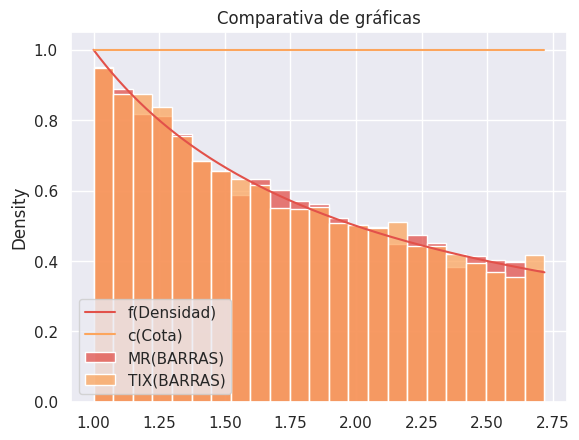

COMPARACIÓN DEL NÚMERO PROMEDIO DE VALORES
----------- --- ------ -------- -- -------
(MR)  🍪 -> 1.723414
(TIX) 🍪 -> 1.719391
(E[X])🍪 -> 1.718282

COMPARACIÓN DEL TIEMPO
----------- --- ------
(MR) ⌛ -> 0.007762 seg
(TIX)⌛ -> 0.003151 seg


In [31]:

x = np.linspace(1,e, 1000)
Nsim = 10_000

methods = [MR, TIX]
results: dict = efitienty_methods(
    methods=methods,
    Nsim=Nsim
)


sns.set_palette("Spectral")
sns.lineplot(x=x, y=f(x=x), label="f(Densidad)")
sns.lineplot(x=x, y=1, label="c(Cota)")
sns.histplot(results["MR"]["samples"], stat='density', label="MR(BARRAS)")
sns.histplot(results["TIX"]["samples"], stat='density', label="TIX(BARRAS)")
plt.title("Comparativa de gráficas")
plt.legend()
plt.show()

mean = e - 1

print("COMPARACIÓN DEL NÚMERO PROMEDIO DE VALORES")
print("----------- --- ------ -------- -- -------")
print(f"(MR)  🍪 -> {results["MR"]["mean"]:4f}")
print(f"(TIX) 🍪 -> {results["TIX"]["mean"]:4f}")
print(f"(E[X])🍪 -> {mean:4f}")

print("\nCOMPARACIÓN DEL TIEMPO")
print("----------- --- ------")

print(f"(MR) ⌛ -> {results["MR"]["time"]:4f} seg")
print(f"(TIX)⌛ -> {results["TIX"]["time"]:4f} seg")

---
**c)** Estime la probabilidad $P(X ≤ 2)$ y compárela con el valor real.

Tenemos que:
$$
P(X ≤ 2) = \int_{-\infty}^2 f(x) dx = \int_{-\infty}^2 \frac{1}{x} \cdot \mathbb{I}_{(1,e)}(x) dx = \int_{1}^2 \frac{1}{x} dx = ln(x)\bigg|_1^2 = ln(2) - ln(1) = ln(2)
$$

Como se puede ver en la comparativa, el método de la *Transformada Inversa* es mejor por ende utilizo esa para simular la probabilidad

In [35]:
def probability_simulation(Nsim:int) -> float:
    """
    Simulación de P(X<=2) con TIX

    Args:
        Nsim (int): Número de simulaciones

    Returns:
        float: estimación de P(X <= 2)
    """
    summation = 0
    for _ in range(Nsim):
        if TIX() <= 2:
            summation += 1
    return summation / Nsim

#Valor real de la probabilidad
probability_real_value = log(2)

In [36]:
print("\nCOMPARACIÓN DE P(X<=2)")
print("----------- -- -------")

print(f"EXACTO 👌🏽 -> {probability_real_value:4f} ")
print(f"SIMUL. 🧪 -> {probability_simulation(Nsim=10_000):4f}")


COMPARACIÓN DE P(X<=2)
----------- -- -------
EXACTO 👌🏽 -> 0.693147 
SIMUL. 🧪 -> 0.686300
